# Gráficas

> Para ejecutar un blóque de código hay descomentarlo y ejecutarlo. Mantener todos los blóques de código comentados permite hacer `Run All` en el notebook para ejecutar el primer bloque de código (carga de dataset, librerías generales, etc) y el bloque objetivo de forma rápida.


98 10000


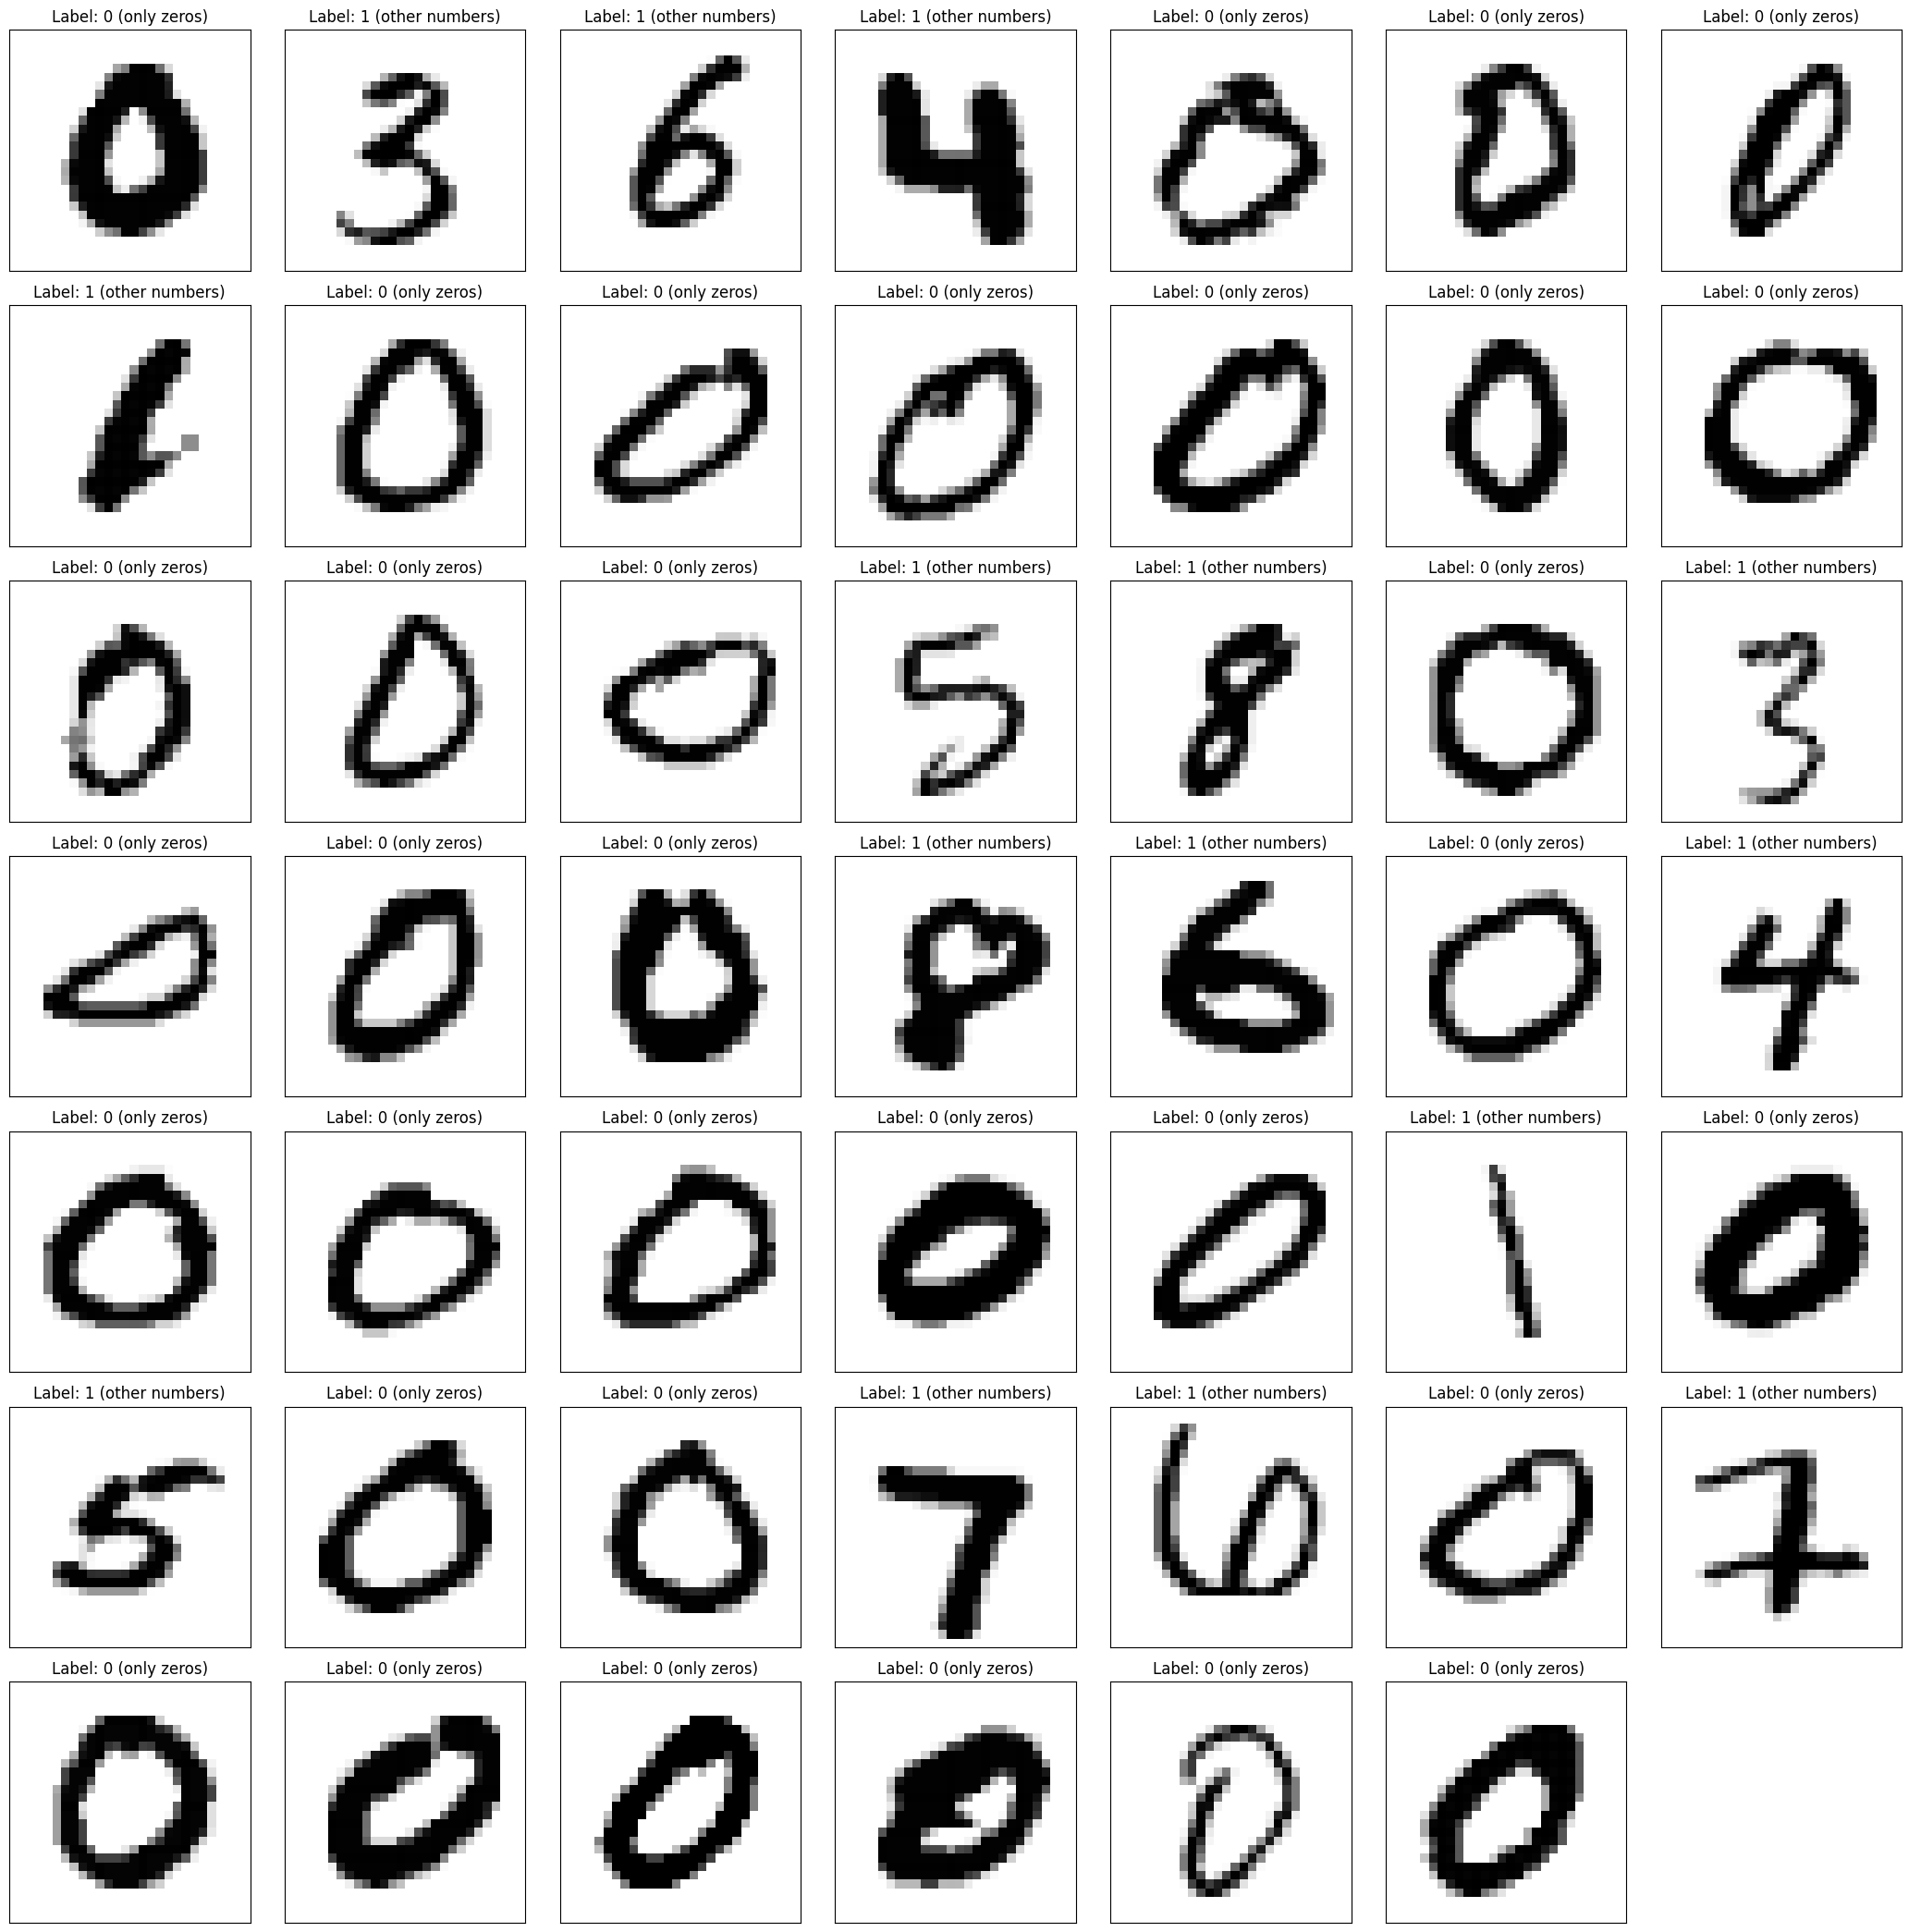

In [4]:
import numpy as np


from utils.datasets import load_dataset, tts, show_digits

data, labels = load_dataset()
X_train, X_test, y_train, y_test = tts(
    data, labels, train_quantity=100, under_sampling=True
)
print(len(y_train), len(y_test))
show_digits(X_train[:48], y_train[:48])

#### 1. Cargar dataset y mostrar ejemplo


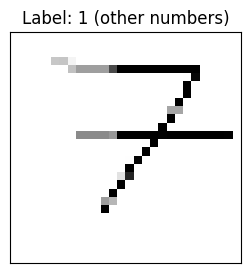

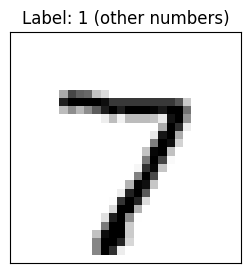

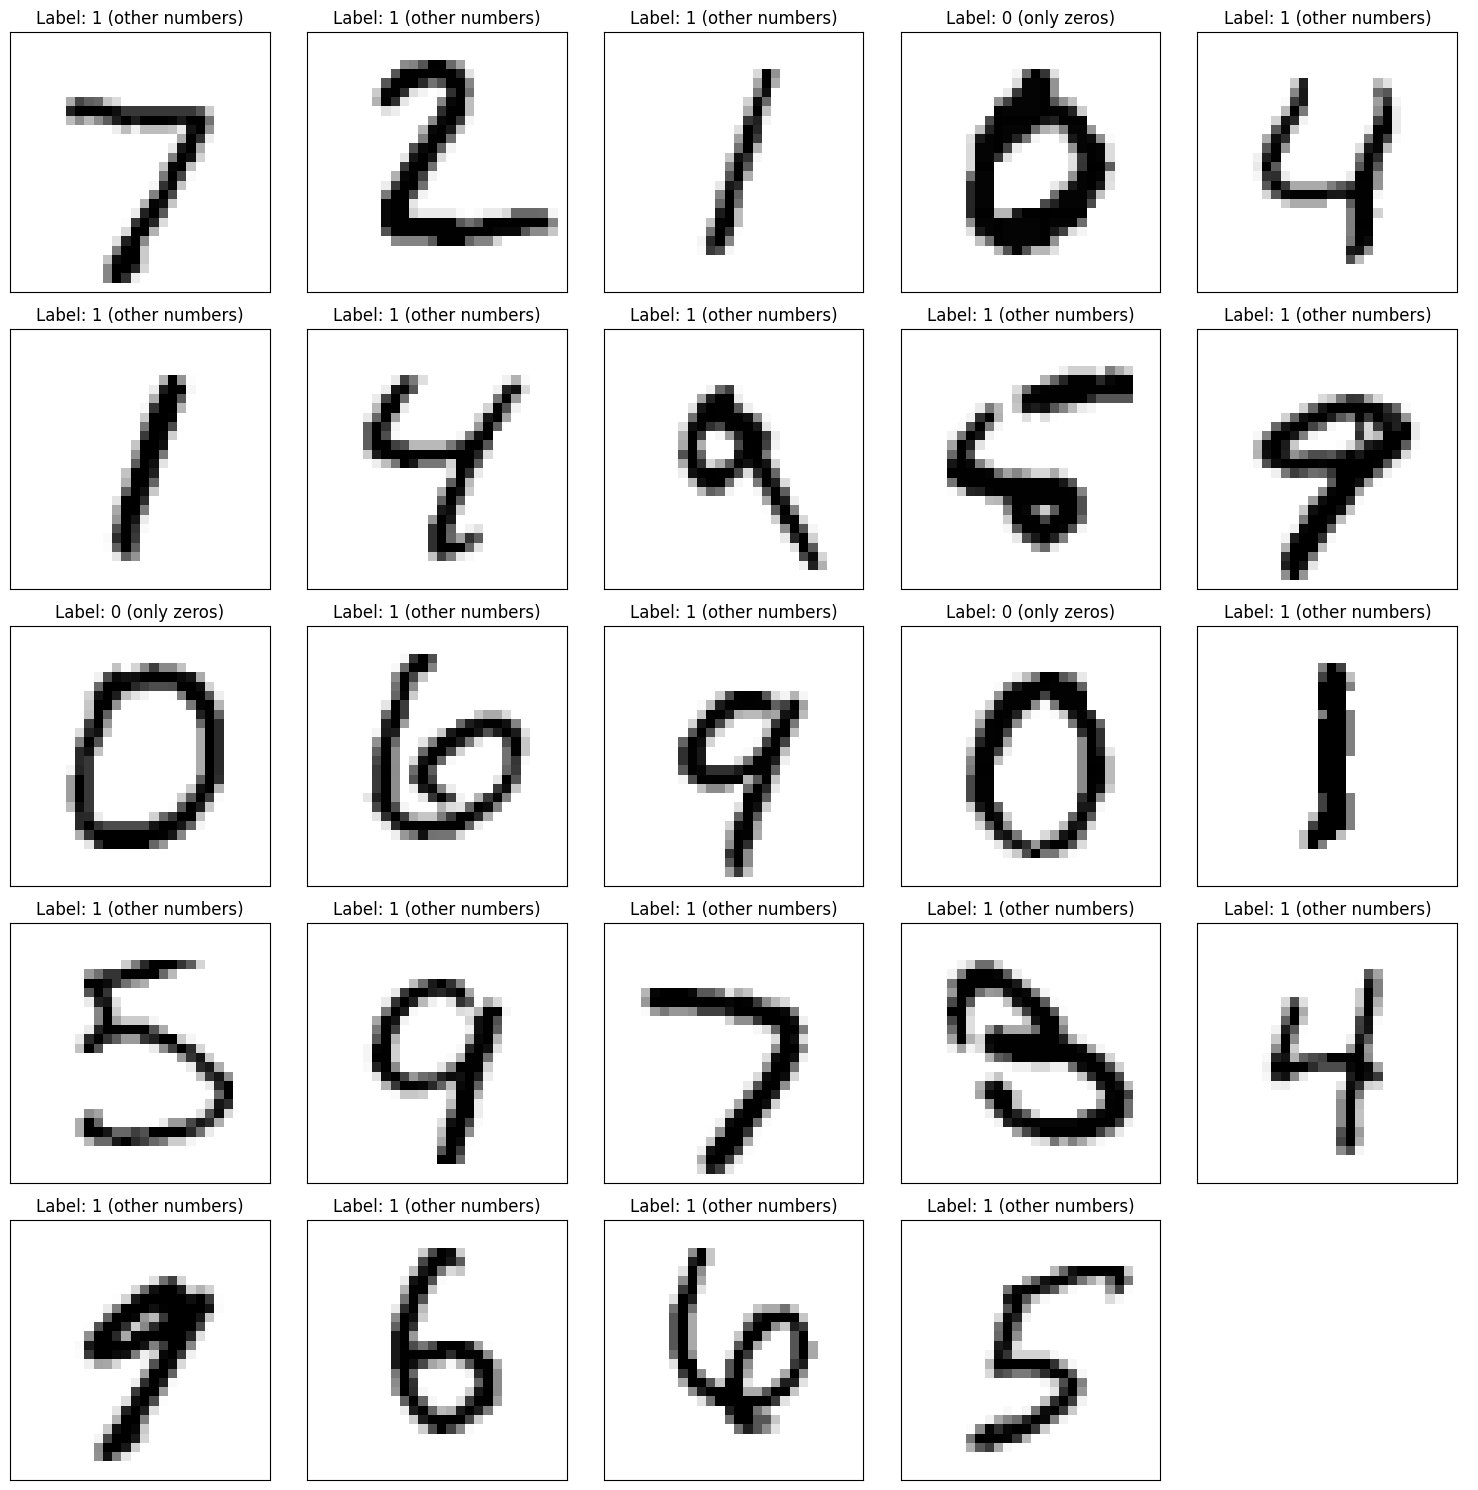

In [5]:
from utils.datasets import load_dataset, show_digit, show_digits, process_new_image, tts
from tqdm import tqdm


sample_image, sample_label = process_new_image("sample_7_900.png", 1)
data, labels = load_dataset()

# show_digit(sample_image, sample_label)
# show_digit(data[0], labels[0])
# show_digits(data[:24], labels[:24])

### 2. Plots con un solo modelo


#### Linear y Quadratic `TODO`


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.ticker import MaxNLocator
# from utils.models import Linear, QDA

# # Inicializar los modelos
# linear = Linear()
# qda = QDA()
# repetitions = 5
# # Listas para almacenar los resultados
# linear_results = []
# qda_results = []

# # Realizar las repeticiones
# for _ in range(repetitions):
#     # Ajustar y evaluar el modelo lineal
#     X_train, X_test, y_train, y_test = tts(data, labels, test_size=0.7)
#     linear.fit(X_train, y_train)
#     linear_results.append(linear.evaluate_f1(X_test, y_test))

#     # Ajustar y evaluar el modelo cuadrático
#     qda.fit(X_train, y_train)
#     qda_results.append(qda.evaluate_f1(X_test, y_test))

# # Crear el gráfico
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Asegurar que sólo se muestren números enteros en el eje x
# ax.plot(range(repetitions), linear_results, marker='o', linestyle='-', color='b', label='Linear')
# ax.plot(range(repetitions), qda_results, marker='o', linestyle='-', color='r', label='QDA')
# ax.set_xlabel('Repetition')
# ax.set_ylabel('F1 Score')
# ax.set_title('Model Performance over {} Repetitions'.format(repetitions))
# ax.legend()
# ax.grid(True)
# plt.show()

#### KNN variando K, mostrar varias líneas, 1 por cada repetición. `DONE`


In [ ]:
from utils.models import KNN
from utils.visualization import plot_knn_f1

knn_f1_scores_list = []
n_reps = 5
neighbours = 25

pbar = tqdm(total=n_reps * neighbours)
for n_rep in range(n_reps):
    X_train, X_test, y_train, y_test = tts(
        data, labels, test_size=0.7, random_state=n_rep
    )
    knn_f1_scores = []
    for neighbour in range(neighbours):
        knn = KNN(n_neighbors=neighbour + 1)
        knn.fit(X_train, y_train)
        score = knn.evaluate_f1(X_test, y_test)
        knn_f1_scores.append(score)
        pbar.update(1)

    knn_f1_scores_list.append(knn_f1_scores)

pbar.close()
plot_knn_f1(f1_scores=knn_f1_scores_list)

#### MLP variando neuronas de primera capa, varias líneas, 1 por cada repetición. `DONE`


 80%|████████  | 20/25 [00:10<00:00,  5.56it/s]c:\Users\Salva\Documents\projects\digits-mdam\_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 25/25 [00:15<00:00,  1.66it/s]


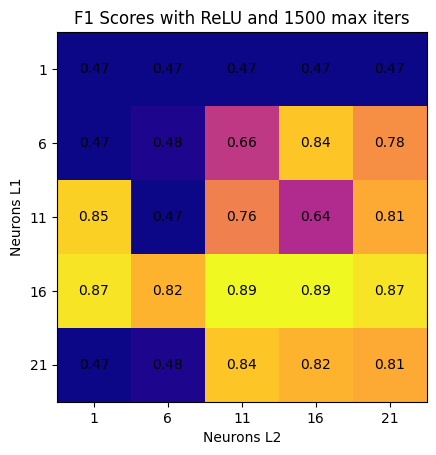

In [14]:
from utils.models import MLP
import numpy as np
from matplotlib import pyplot as plt


X_train, X_test, y_train, y_test = tts(data, labels, train_quantity=100)

f1_scores_list = []
pbar = tqdm(total=5 * 5)

layer_grid = [1, 6, 11, 16, 21]

# 5x5 grid de f1 scores de MLPs
for i in layer_grid:
    f1_scores = []
    for j in layer_grid:
        mlp = MLP(hls=(i, j), max_iter=2000)
        mlp.fit(X_train, y_train)
        score = mlp.evaluate_f1(X_test, y_test)
        f1_scores.append(round(score, 2))
        pbar.update(1)

    f1_scores_list.append(f1_scores)

pbar.close()
# Mostramos la gráfica
datos = np.array(f1_scores_list)
fig, ax = plt.subplots()
im = ax.imshow(datos, cmap="plasma", interpolation="nearest")

# Mostramos los números en cada celda
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        text = ax.text(j, i, datos[i, j], ha="center", va="center")

# Configuramos los ejes
ax.set_xticks(np.arange(datos.shape[1]))
ax.set_yticks(np.arange(datos.shape[0]))
ax.set_title("F1 Scores with ReLU and 1500 max iters")
ax.set_xticklabels(layer_grid)
ax.set_yticklabels(layer_grid)
ax.set_xlabel("Neurons L2")
ax.set_ylabel("Neurons L1")

plt.show()

#### SVM variando el kernel y el valor de C, 1 línea por kernel, se hace la media de 5 repeticiones y se plotea `DONE`


In [ ]:
# from utils.models import SVM
# import numpy as np
# from matplotlib import pyplot as plt
# from sklearn.model_selection import train_test_split as tts

# # Definir los valores de C y kernel que quieres probar
# C_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3]
# kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# pbar = tqdm(total=len(C_values) * len(kernels) * 5)

# # Crear listas vacías para almacenar los resultados
# scores = {kernel: np.zeros(len(C_values)) for kernel in kernels}

# # Realizar 5 repeticiones del proceso de entrenamiento y evaluación
# for _ in range(5):
#     X_train, X_test, y_train, y_test = tts(data, labels, test_size=0.99)

#     # Iterar sobre los valores de C y kernel
#     for kernel in kernels:
#         for i, C in enumerate(C_values):
#             # Crear y entrenar el modelo SVM
#             svm = SVM(kernel=kernel, C=C)
#             svm.fit(X_train, y_train)

#             # Evaluar el modelo y almacenar el resultado
#             score = svm.evaluate_f1(X_test, y_test)
#             scores[kernel][i] += score
#             pbar.update(1)

# # Calcular el promedio de los puntajes
# for kernel in kernels:
#     scores[kernel] = [score / 5 for score in scores[kernel]]
# pbar.close()
# # Crear un gráfico de los resultados
# plt.figure(figsize=(12, 6))
# for kernel in kernels:
#     plt.plot(C_values, scores[kernel], marker='o', label=kernel)
# plt.xlabel('C')
# plt.ylabel('F1 Score')
# plt.title('Performance of SVM varying the kernel and C')
# plt.legend()
# plt.show()

#### KMeans variando número de clusters, mostrar varias líneas, 1 por cada repetición. `DONE`


In [ ]:
# from sklearn.cluster import KMeans
# import numpy as np
# from matplotlib import pyplot as plt
# from sklearn.model_selection import train_test_split as tts
# from sklearn.metrics import f1_score
# from sklearn.preprocessing import LabelEncoder

# # Definir los valores de n_clusters que quieres probar
# n_clusters_values = range(1, 11)
# pbar = tqdm(total=5 * 10)
# # Convertir las etiquetas a números para calcular f1_score
# le = LabelEncoder()
# le.fit(labels)  # Fit on all labels

# plt.figure(figsize=(12, 6))

# # Realizar 5 repeticiones del proceso de entrenamiento y evaluación
# all_scores = []
# for rep in range(5):
#     # Crear una lista vacía para almacenar los resultados de esta repetición
#     scores = []

#     X_train, X_test, y_train, y_test = tts(data, le.transform(labels), test_size=0.7)

#     # Iterar sobre los valores de n_clusters
#     for n_clusters in n_clusters_values:
#         # Crear y entrenar el modelo KMeans
#         kmeans = KMeans(n_clusters=n_clusters)
#         kmeans.fit(X_train)

#         # Evaluar el modelo y almacenar el resultado
#         y_pred = kmeans.predict(X_test)

#         score = f1_score(y_test, y_pred, average='macro')
#         scores.append(score)
#         pbar.update(1)

#     # Dibujar una línea para esta repetición
#     plt.plot(n_clusters_values, scores, marker='o', label=f'Repetition {rep+1}')
#     all_scores.append(scores)

# pbar.close()

# # Calcular la media de los puntajes F1
# mean_scores = np.mean(all_scores, axis=0)

# # Dibujar la línea de la media
# plt.plot(n_clusters_values, mean_scores, 'k--', label='Mean')

# plt.xlabel('Number of clusters (n_clusters)')
# plt.ylabel('F1 Score')
# plt.title('Performance of KMeans varying the number of clusters')
# plt.legend()
# plt.show()

### 3. Plots con varios modelos


#### Gráfica Curva ROC, varias líneas, 1 por cada modelo.


In [ ]:
from sklearn.metrics import auc
from utils.models import KNN, Linear, MLP, SVM, QDA
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = tts(
    data,
    labels,
    train_quantity=100, under_sampling=True
)


classifiers = {
    "KNN": KNN(),
    "Linear": Linear(),
    "MLP": MLP(),
    "SVM": SVM(probability=True),
    "QDA": QDA(),
}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    fpr, tpr, thresholds = model.roc_curve(X_test, y_test)
    roc_auc = auc(fpr, tpr)

    # Calcula el umbral óptimo (punto más cercano a la esquina superior izquierda)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    # Agrega la curva ROC a la gráfica y guarda la línea dibujada
    (line,) = plt.plot(
        fpr, tpr, label=f"{name} - TH {optimal_threshold:.2f} - AUC {roc_auc:.2f}"
    )

    # Agrega el punto del umbral óptimo a la gráfica con el mismo color que la línea
    plt.plot(
        fpr[optimal_idx],
        tpr[optimal_idx],
        marker="o",
        color=line.get_color(),
    )

plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcula el número de filas necesarias
n = len(classifiers)
n_rows = n // 2 + n % 2

fig, axs = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))

# Asegúrate de que axs sea una lista de listas
if n_rows == 1:
    axs = [axs]

for i, (name, model) in enumerate(classifiers.items()):
    # Calcula la matriz de confusión
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Invierte la matriz de confusión
    cm = np.flip(cm, axis=0)
    cm = np.flip(cm, axis=1)

    # Dibuja la matriz de confusión
    ax = axs[i // 2][i % 2]
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap="Blues")
    ax.set_title(f"Matriz de Confusión - {name}")
    ax.set_xlabel("Predicho")
    ax.set_ylabel("Real")

# Si hay un número impar de clasificadores, elimina el último gráfico vacío
if n % 2:
    fig.delaxes(axs[-1][-1])

plt.tight_layout()
plt.show()

#### Gráfica mostrando la velocidad de aprendizaje de cada modelo `DONE`


In [ ]:
from utils.models import *
import matplotlib.pyplot as plt
from tqdm import tqdm
random_state = 42
train_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] 

models = {
    "knn": KNN(),
    "svm": SVM(),
    "mlp": MLP(),
    "linear": Linear(),
    "kmeans": KMeans(),
}

pbar = tqdm(total=len(models) * len(train_sizes))
for name, model in models.items():
    scores = []
    pbar.set_description(f"Training {name} model")
    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = tts(
            data,
            labels,
            train_quantity=train_size,
            random_state=random_state,
        )
        model.fit(X_train, y_train)
        score = model.evaluate_f1(X_test, y_test)
        scores.append(score)
        pbar.update(1)
    plt.plot(train_sizes, scores, label=name)

pbar.close()
plt.xlabel("Train Size")
plt.ylabel("Score")
plt.legend()
plt.show()